In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from bmi_cfe import BMI_CFE

# 1. Run Normal CFE Simulations

In [2]:
cfe_instance = BMI_CFE()

In [3]:
cfe_instance.initialize(bmi_cfg_file_name='./cat58_config_cfe.json')

In [4]:
with open(cfe_instance.forcing_file, 'r') as f:
    df_forcing = pd.read_csv(f)
    
outputs = cfe_instance.get_output_var_names()
output_lists = {output:[] for output in outputs}

for precip in df_forcing['APCP_surface']:
    
    cfe_instance.set_value('atmosphere_water__time_integral_of_precipitation_mass_flux', precip)
    
    cfe_instance.update()
    
    for output in outputs:
    
        output_lists[output].append(cfe_instance.get_value(output))

In [5]:
cfe_instance.finalize(print_mass_balance=True)


GLOBAL MASS BALANCE
  initial volume:   0.7456
    volume input: 259.2000
   volume output: 247.8860
    final volume:   1.4450
        residual: -1.3856e-13

PARTITION MASS BALANCE
    surface runoff: 256.5086
      infiltration:   2.6914
 vol. et from rain:   0.0000
partition residual: 2.4425e-14

GIUH MASS BALANCE
  vol. into giuh: 256.5086
   vol. out giuh: 245.8940
 vol. end giuh q:  10.6146
   giuh residual: -2.3093e-13

SOIL WATER MASS BALANCE
     init soil vol:   0.5856
    vol. into soil:   2.6914
  vol.soil2latflow:   1.1298
   vol. soil to gw:   1.3747
 vol. et from soil:   0.0000
   final vol. soil:   0.7726
  vol. soil resid.: 0.0000e+00

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   1.1298
  vol. from nash:   0.9143
 final vol. nash:   0.2155
nash casc resid.: 1.0547e-15

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.1600
       vol to gw:   1.3747
     vol from gw:   0.8622
final gw.storage:   0.6725
    gw. residual: 4.4409e-

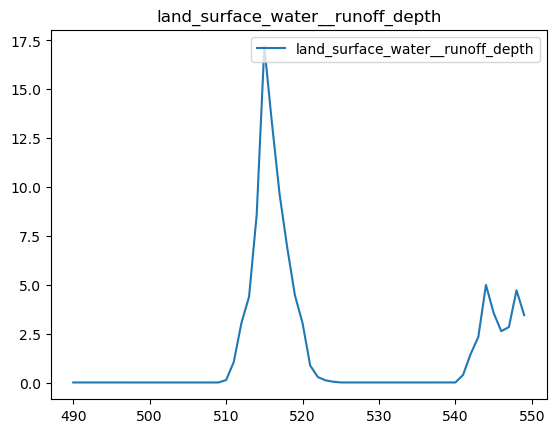

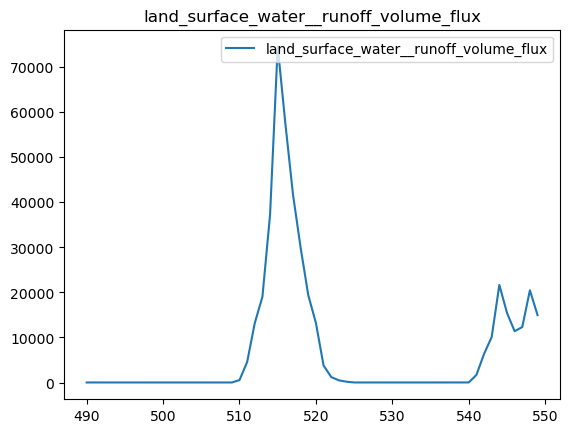

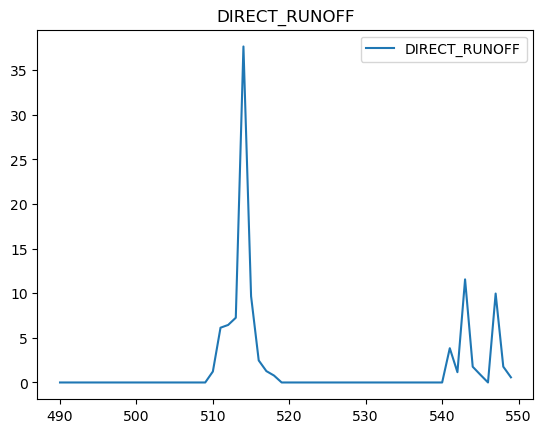

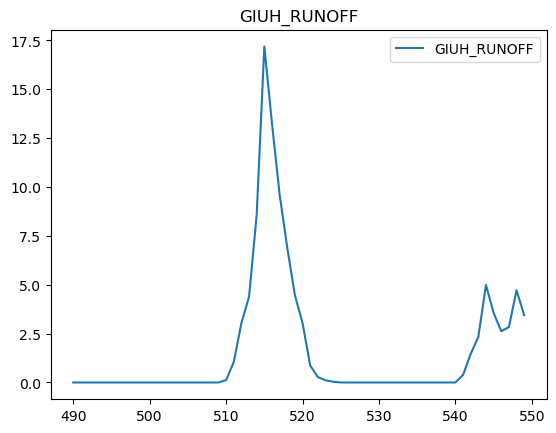

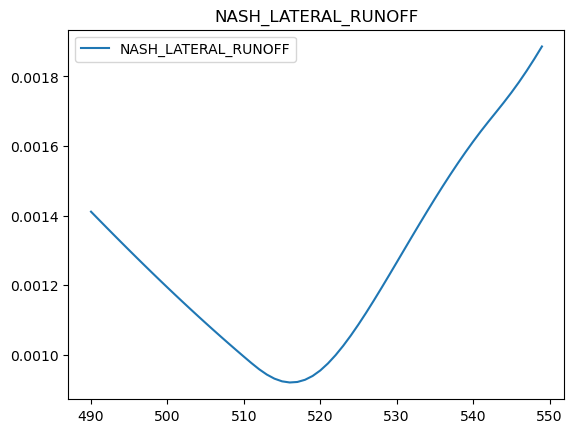

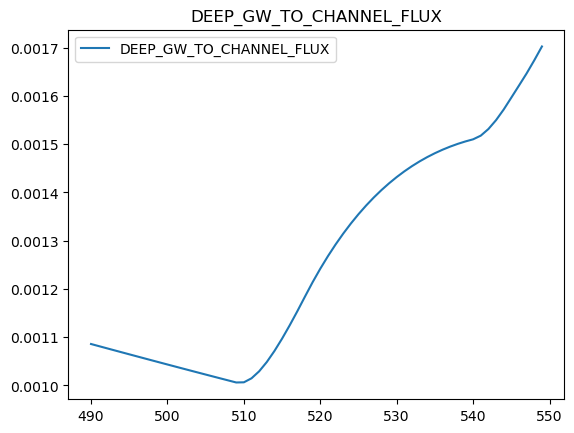

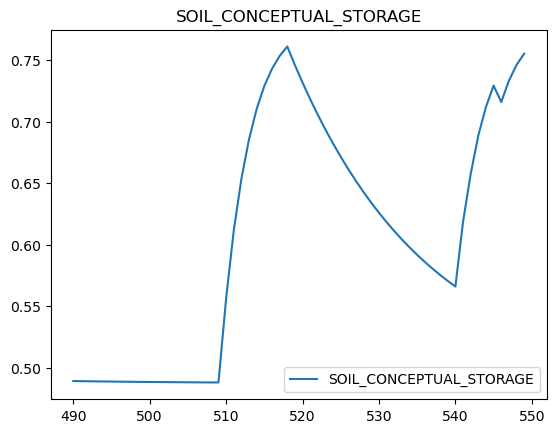

In [6]:
istart_plot = 490
iend_plot = 550
x = list(range(istart_plot, iend_plot))
for output in outputs:
    plt.plot(x, output_lists[output][istart_plot:iend_plot], label=output)
    plt.title(output)
    plt.legend()
    plt.show()
    plt.close()

# 2. Run Unit Tests

## 2.1. Test the Schaake routine

Running the surface partitioning scheme: Schaake


/home/jovyan/data/home/jovyan/cfe_py/bmi_cfe/bmi_cfe.py:554: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.cfe_output_data[t, "SM storage"] = self.soil_reservoir["storage_m"]
/home/jovyan/data/home/jovyan/cfe_py/bmi_cfe/bmi_cfe.py:554: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.cfe_output_data[t, "SM storage"] = self.soil_reservoir["storage_m"]
/home/jovyan/data/home/jovyan/cfe_py/bmi_cfe/bmi_cfe.py:554: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many ti

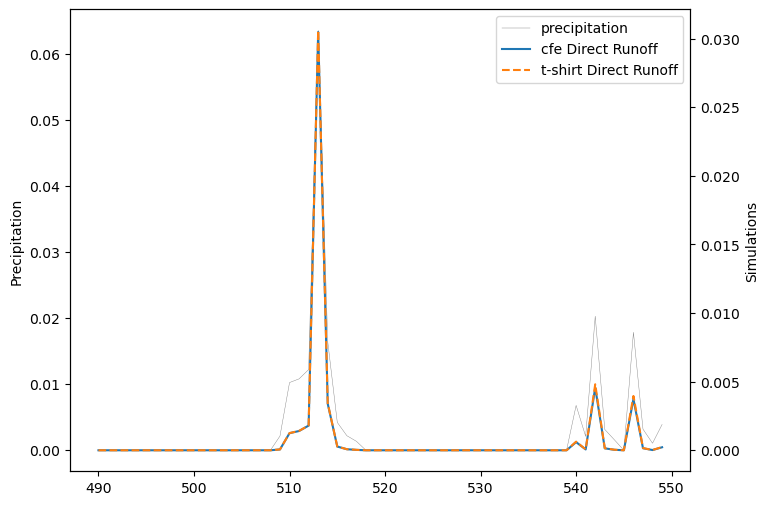

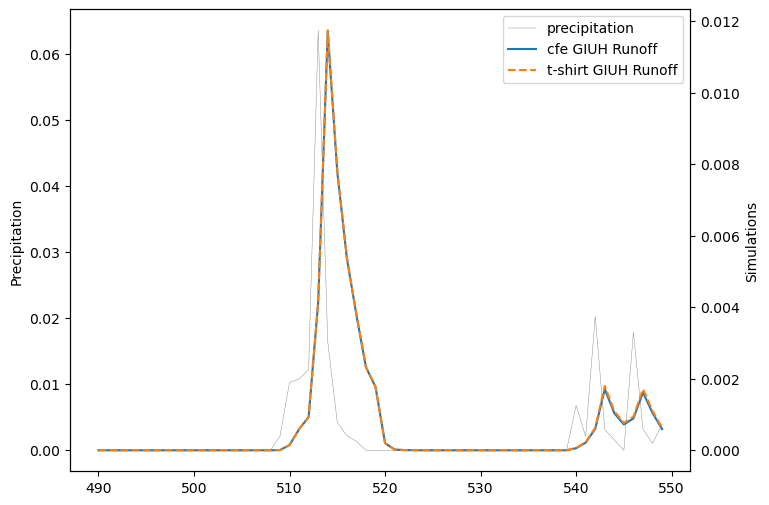

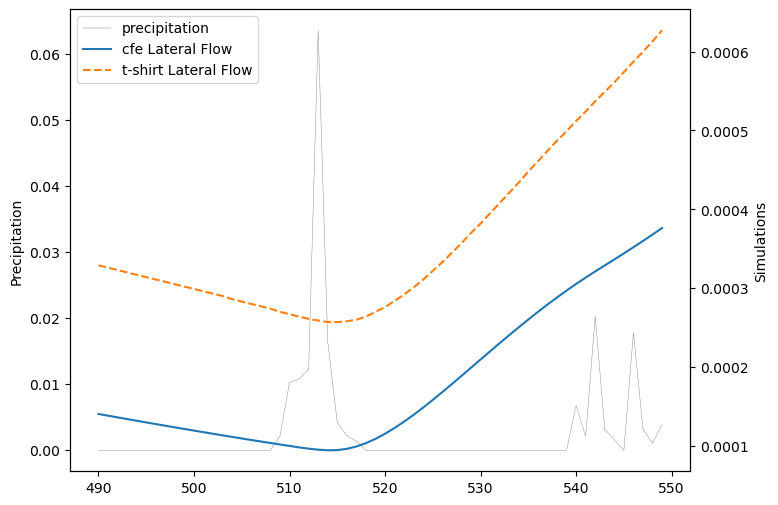

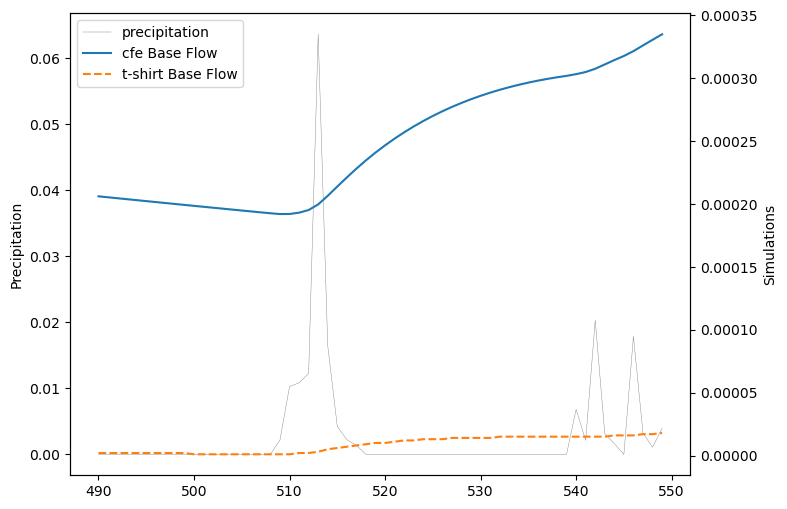

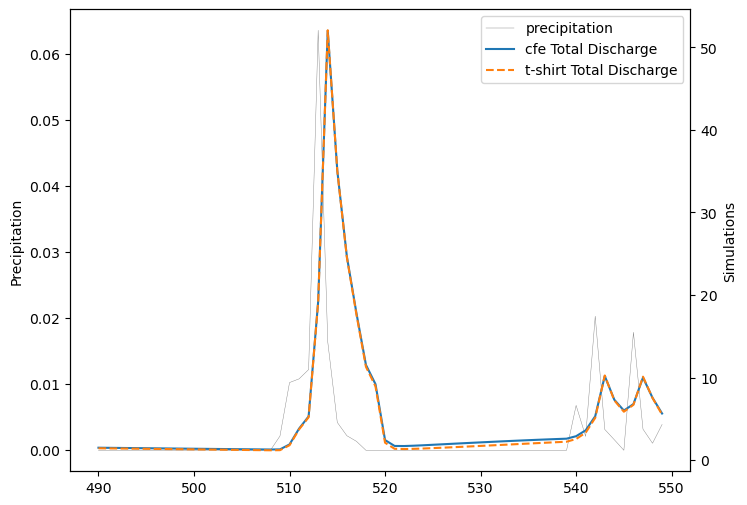

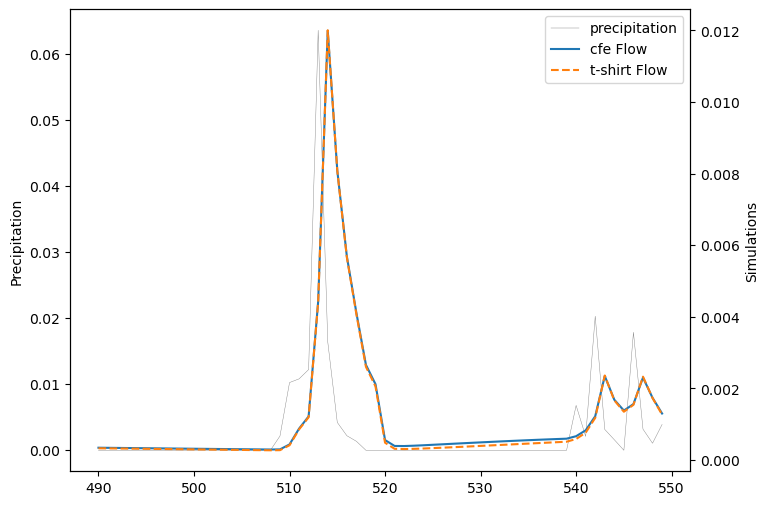

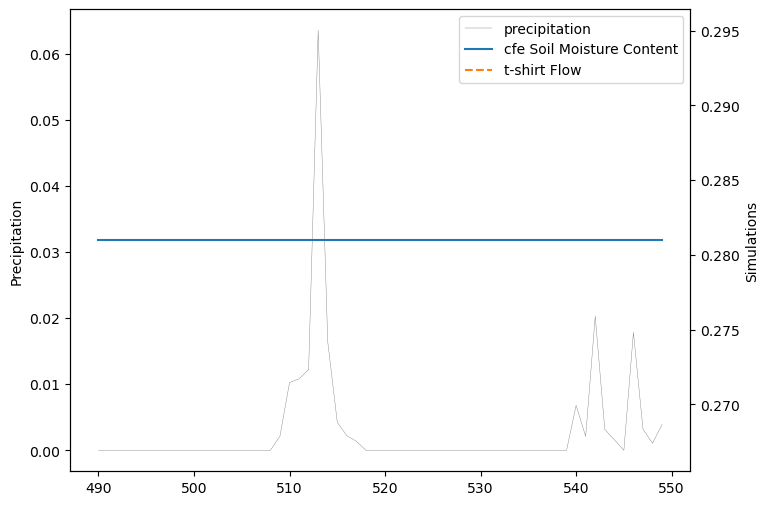

In [7]:
cfe_unit_test = BMI_CFE()
cfe_unit_test.initialize(bmi_cfg_file_name='./cat58_config_cfe.json')
print(f'Running the surface partitioning scheme: {cfe_unit_test.surface_partitioning_scheme}')
cfe_unit_test.run_unit_test(plot=True, print_fluxes=False)

In [8]:
cfe_unit_test.unit_test_data

,Time Step,Time,Rainfall,Direct Runoff,GIUH Runoff,Lateral Flow,Base Flow,Flow,Total Discharge
0,0,2015-12-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000620,0.000620,2.691000
1,1,2015-12-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000583,0.000583,2.528061
2,2,2015-12-01 02:00:00,0.000000,0.000000,0.000000,0.000002,0.000548,0.000550,2.385627
3,3,2015-12-01 03:00:00,0.000000,0.000000,0.000000,0.000007,0.000515,0.000521,2.262081
4,4,2015-12-01 04:00:00,0.000000,0.000000,0.000000,0.000013,0.000484,0.000497,2.155921
...,...,...,...,...,...,...,...,...,...
715,715,2015-12-30 19:00:00,0.006538,0.000644,0.005279,0.000586,0.000011,0.005875,25.485904
716,716,2015-12-30 20:00:00,0.007422,0.000828,0.003946,0.000588,0.000012,0.004546,19.719590
717,717,2015-12-30 21:00:00,0.014680,0.002953,0.002989,0.000592,0.000013,0.003594,15.592070
718,718,2015-12-30 22:00:00,0.005826,0.000544,0.003060,0.000597,0.000014,0.003671,15.923394


In [9]:
cfe_unit_test.finalize(print_mass_balance=True)


GLOBAL MASS BALANCE
  initial volume:   0.7456
    volume input:   0.4548
   volume output:   0.5351
    final volume:   0.6637
        residual: -2.3354e-16

PARTITION MASS BALANCE
    surface runoff:   0.0975
      infiltration:   0.3573
 vol. et from rain:   0.0000
partition residual: 0.0000e+00

GIUH MASS BALANCE
  vol. into giuh:   0.0975
   vol. out giuh:   0.0959
 vol. end giuh q:   0.0016
   giuh residual: -2.5370e-17

SOIL WATER MASS BALANCE
     init soil vol:   0.5856
    vol. into soil:   0.3573
  vol.soil2latflow:   0.1719
   vol. soil to gw:   0.2091
 vol. et from soil:   0.0000
   final vol. soil:   0.5620
  vol. soil resid.: -1.1102e-16

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   0.1719
  vol. from nash:   0.1441
 final vol. nash:   0.0278
nash casc resid.: 0.0000e+00

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.1600
       vol to gw:   0.2091
     vol from gw:   0.2674
final gw.storage:   0.1017
    gw. residual: 1.1102e

## 2.2. Test the Xinanjiang Routine

Running the surface partitioning scheme: Xinanjiang


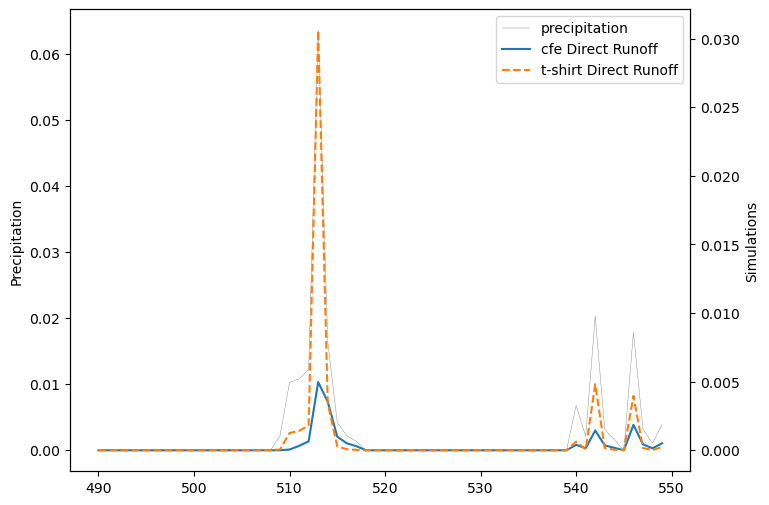

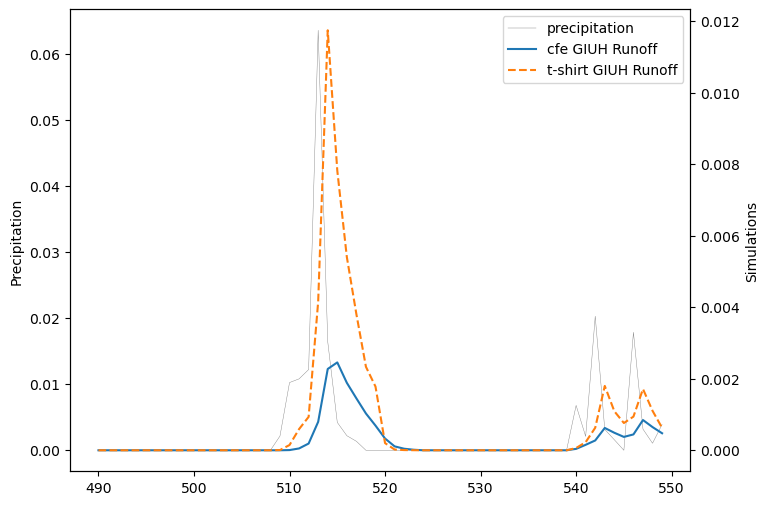

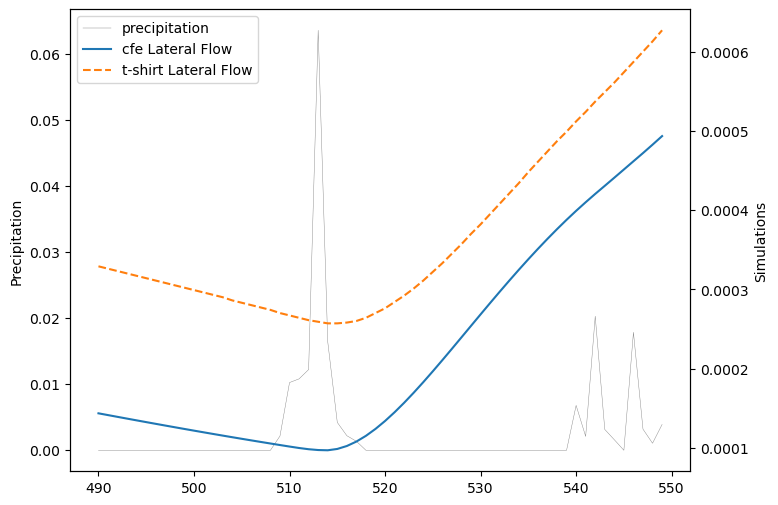

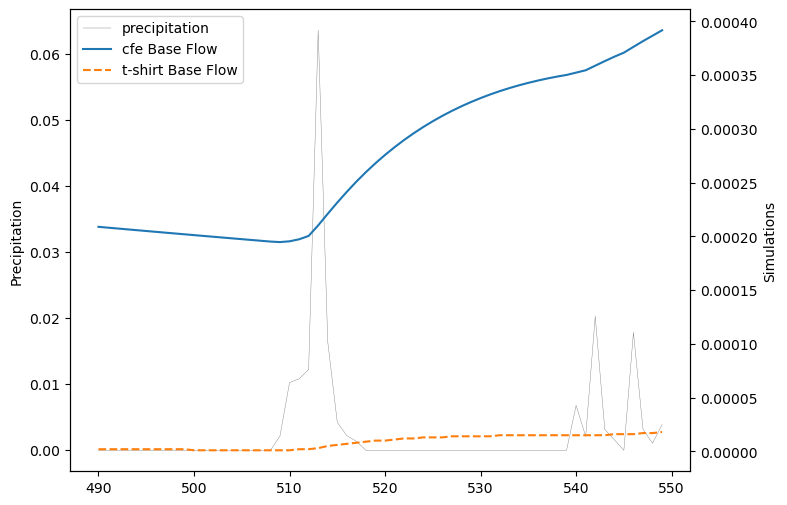

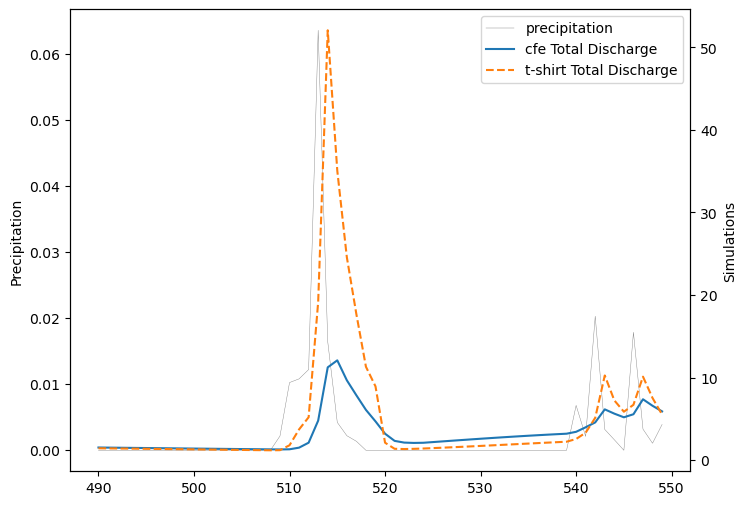

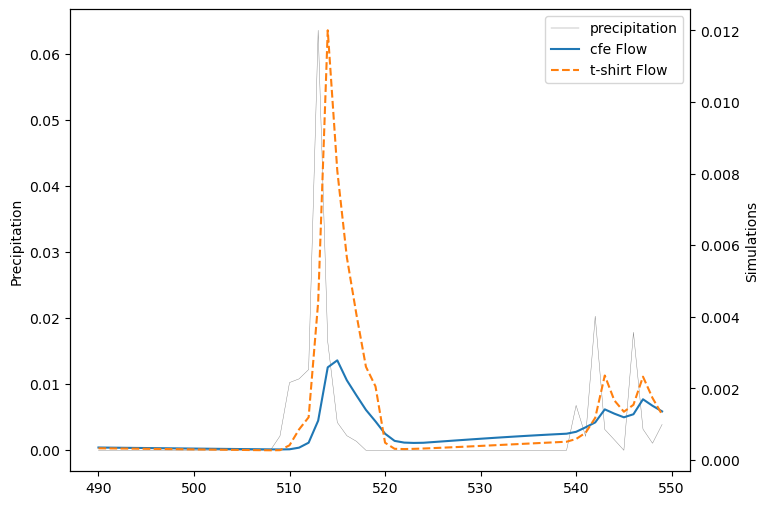

In [11]:
cfe_unit_test_x = BMI_CFE()
cfe_unit_test_x.initialize(bmi_cfg_file_name='./cat58_config_cfe_x.json')
print(f'Running the surface partitioning scheme: {cfe_unit_test_x.surface_partitioning_scheme}')
cfe_unit_test_x.run_unit_test(plot=True, print_fluxes=False)

In [12]:
cfe_unit_test_x.finalize(print_mass_balance=True)


GLOBAL MASS BALANCE
  initial volume:   0.7456
    volume input:   0.4548
   volume output:   0.5066
    final volume:   0.6909
        residual: 4.8095e-16

PARTITION MASS BALANCE
    surface runoff:   0.0389
      infiltration:   0.4160
 vol. et from rain:   0.0000
partition residual: -1.6653e-16

GIUH MASS BALANCE
  vol. into giuh:   0.0389
   vol. out giuh:   0.0359
 vol. end giuh q:   0.0029
   giuh residual: 9.1073e-18

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
     init soil vol:   0.5856
    vol. into soil:   0.4160
  vol.soil2latflow:   0.1933
   vol. soil to gw:   0.2352
 vol. et from soil:   0.0000
   final vol. soil:   0.5732
  vol. soil resid.: 2.2204e-16

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   0.1933
  vol. from nash:   0.1589
 final vol. nash:   0.0344
nash casc resid.: 3.6082e-16

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.1600
       vol to gw:   0.2352
     vol from gw:   0.2774
final gw.storage:   0.1177
    gw